In [2]:
from tensorflow import keras
from board_labeler import dictClasses, dctInv

model = keras.models.load_model('models/secondmodel')

In [3]:
import cv2
from board_finder import imageResize, getBoardCoords
from piece_recognizer import from_piece_to_name, simple_display_board, forsyth_edward_display_board

board = imageResize(cv2.imread("Board_Examples/medium2.png"), 0.5)

pieces_images = getBoardCoords(board)

In [4]:
import numpy as np

prediction_class = model.predict(np.array(pieces_images)) # ALWAYS USE NP.ARRAY AND GIVE IT AN ARRAY TO PREDICT

In [5]:
from PIL import Image

pieces_names = []
recognized_board = []
clean_pieces_images = []

size = 100
dim = (size, size)

j = 0

for i, im in enumerate(pieces_images):
    # Get the class with the highest probability
    class_predicted = dctInv[prediction_class[i].argmax()]

    pieces_names.append(class_predicted)
    recognized_board.append(from_piece_to_name(class_predicted))

    if class_predicted == 'empty':
        piece = Image.new('RGBA', dim)
    else:
        piece = Image.open(f"pieces_screens/pieces/{class_predicted}.png").convert("RGBA")

    if i % 8 == 0 and i != 0:
        if j == 0:
            j = 1
        else:
            j = 0

    if (i + j) % 2 == 0:
        background = Image.open('pieces_screens/backgrounds/bgwhite.png').convert("RGBA")
    else:
        background = Image.open('pieces_screens/backgrounds/bgblack.png').convert("RGBA")

    background.paste(piece, (0, 0), piece)
    background = background.resize(dim)
    clean_pieces_images.append(background)

simple_display_board(recognized_board)
forsyth_edward_display_board(recognized_board)

Simple board display:
p - p - p r p - 
p p p p - p p - 
- - p - - p - - 
- - b - p - - - 
- - - - P - - - 
P - Q P - P - - 
- P P P Q P P P 
- - K R - P - R 

Forsyth Edward Notation (FEN) board display:
p1p1prp1/pppp1pp1/2p2p2/2b1p3/4P3/P1QP1P2/1PPPQPPP/2KR1P1R



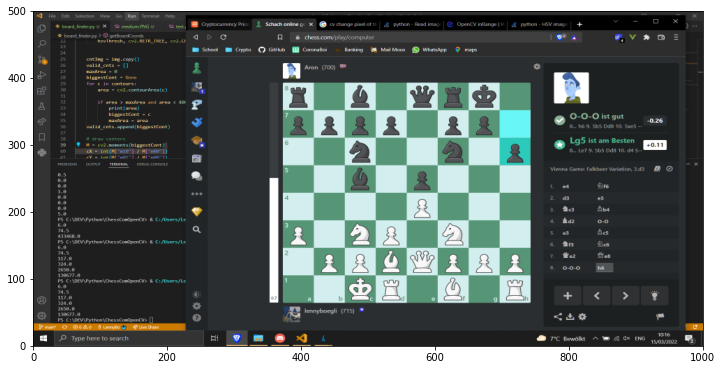

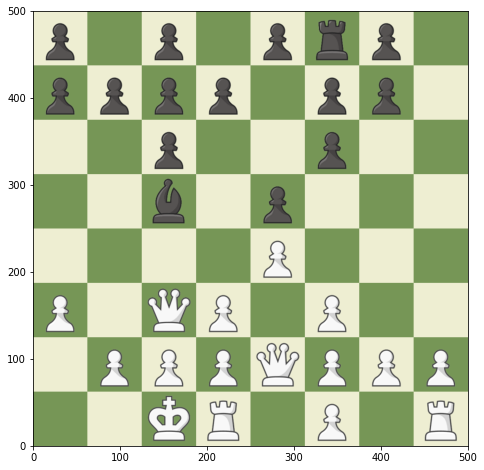

In [17]:
import matplotlib.pyplot as plt

def get_recognized_board(pieces_images):
    lines = []
    for i in range(8):
        line_list = [pieces_images[i*8+j] for j in range(8)]
        lines.append(np.concatenate(line_list, axis=1))
    
    board = np.concatenate(lines, axis=0)
    cv2.imwrite('recognized_board.png', board)
    
    return board

recognized_board_image = get_recognized_board(clean_pieces_images)

size = 500

fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(board, extent=[0, size*2, 0, size])

fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(recognized_board_image, extent=[0, size, 0, size])

plt.show()